In [163]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [145]:
df = pd.read_csv('combined_data_1.txt', names = ['Cust_Id', 'Rating'], usecols = [0,1])
tqdm.pandas()
df['Rating'] = df['Rating'].astype(float)
df=df[:2000]
last_row_index=df.shape[0]

    Cust_Id  Rating
0        1:     NaN
1   1488844     3.0
2    822109     5.0
3    885013     4.0
4     30878     4.0
5    823519     3.0
6    893988     3.0
7    124105     4.0
8   1248029     3.0
9   1842128     4.0
10  2238063     3.0
11  1503895     4.0
12  2207774     5.0
13  2590061     3.0
14     2442     3.0
15   543865     4.0
16  1209119     4.0
17   804919     4.0
18  1086807     3.0
19  1711859     4.0
20   372233     5.0
21  1080361     3.0
22  1245640     3.0
23   558634     4.0
24  2165002     4.0
25  1181550     3.0
26  1227322     4.0
27   427928     4.0
28   814701     5.0
29   808731     4.0
30   662870     5.0
31   337541     5.0
32   786312     3.0
33  1133214     4.0
34  1537427     4.0
35  1209954     5.0
36  2381599     3.0
37   525356     2.0
38  1910569     4.0
39  2263586     4.0
40  2421815     2.0
41  1009622     1.0
42  1481961     2.0
43   401047     4.0
44  2179073     3.0
45  1434636     3.0
46    93986     5.0
47  1308744     5.0
48  2647871     4.0


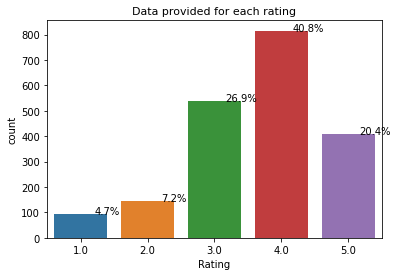

In [146]:
#print data
print(df.head(50))

#view data

ax = sns.countplot(x="Rating", data=df)
plt.title('Data provided for each rating', fontsize=11)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [176]:
customer_df = df[pd.notnull(df['Rating'])]
print(customer_df.shape)
print(df.shape)

(1997, 2)
(2000, 2)


In [177]:
# adding moviesid column in customer_df
movie_np = np.array([])
# get movie count
movie_count = df.isnull().sum()[1]
print('total no of movies',movie_count)
#get all the movie id where Rating column value is none
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating'] == True]
df_nan = df_nan.reset_index()
movie_id_collection=df_nan['index'].to_numpy()
print('row containing movieid',movie_id_collection)

total no of movies 3
row containing movieid [  0 548 694]


In [178]:
mov_ar=df.loc[movie_id_collection].to_numpy()
mov_ar=np.delete(mov_ar,[1],1)
print(mov_ar)

[['1:']
 ['2:']
 ['3:']]


In [179]:
#replace values in movie_np with actual movie ID
start=0
end=0
for i in tqdm(range(len(movie_id_collection))):
    row_id=movie_id_collection[i]
    movie_id=mov_ar[i][0]
    movie_id=movie_id.strip(':')
    
    start=movie_id_collection[i]+1
    if i!=len(movie_id_collection)-1:
        end=movie_id_collection[i+1]-1
    else:
        end=last_row_index-1
    movie=np.array([movie_id]*(end-start+1))
    movie_np=np.append( movie_np , movie )


100%|██████████| 3/3 [00:00<00:00, 1892.45it/s]


In [181]:
movie_np.shape
customer_df.shape

(1997, 2)

In [183]:
customer_df['Movies_Id']=movie_np.astype(int)
customer_df.shape
movie_count

3

In [184]:
print(customer_df.head(50))

    Cust_Id  Rating  Movies_Id
1   1488844     3.0          1
2    822109     5.0          1
3    885013     4.0          1
4     30878     4.0          1
5    823519     3.0          1
6    893988     3.0          1
7    124105     4.0          1
8   1248029     3.0          1
9   1842128     4.0          1
10  2238063     3.0          1
11  1503895     4.0          1
12  2207774     5.0          1
13  2590061     3.0          1
14     2442     3.0          1
15   543865     4.0          1
16  1209119     4.0          1
17   804919     4.0          1
18  1086807     3.0          1
19  1711859     4.0          1
20   372233     5.0          1
21  1080361     3.0          1
22  1245640     3.0          1
23   558634     4.0          1
24  2165002     4.0          1
25  1181550     3.0          1
26  1227322     4.0          1
27   427928     4.0          1
28   814701     5.0          1
29   808731     4.0          1
30   662870     5.0          1
31   337541     5.0          1
32   786